In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import json
import pyhf
from pyhf.contrib.viz import brazil

In [3]:
data=pd.read_csv('Data.dat',sep=' ')
background=pd.read_csv('Background.dat',sep=' ')
signal1=pd.read_csv('Signal1Higgs.dat',sep=' ')
signal2=pd.read_csv('Signal2Axial.dat',sep=' ')
signaltoy=pd.read_csv('pt_miss_histogram_monojet_BMtoy.csv',sep=',')

In [4]:

signal1=signal1['y'].to_numpy()
signal2=signal2['y'].to_numpy()
signalt=signaltoy['counts'].to_numpy()

In [5]:

"""s1=np.zeros_like(signal1)
s2=np.zeros_like(signal2)
for i in range(len(background)):
    s1[i]=float(signal1[i].replace(',','.'))
    s2[i]=float(signal2[i].replace(',','.'))"""


"s1=np.zeros_like(signal1)\ns2=np.zeros_like(signal2)\nfor i in range(len(background)):\n    s1[i]=float(signal1[i].replace(',','.'))\n    s2[i]=float(signal2[i].replace(',','.'))"

In [6]:
#factor=np.array([30,30,30,30,30,40,40,40,40,40,40,50,50,50,50,50,60,60,60,70,70,90])

In [7]:
"""s1=s1*factor
s2=s2*factor"""

's1=s1*factor\ns2=s2*factor'

In [8]:
factor=np.linspace(0.01,2,100)

In [9]:
bkg1=np.array([132100,69900,36800,20780,12340,9160,5100,3000,1763,1032,683,554,322,178,122,74.5,77.8,38.4,25.1,21.1,9.4,22.6])
observed=np.array([140642,73114,38321,21417,12525,9515,5174,2947,1777,1021,694,554,339,196,123,80,68,37,23,12,7,26])
errbkg1=np.array([4000,2200,1100,630,400,320,200,120,79,48,37,28,19,13,8,6.6,7.2,4.8,3.4,3.0,1.9,3.0])



In [10]:
signals=[]
for i in range(len(factor)):
    signal=factor[i]*signalt
    signals.append(signal)

In [11]:
from tqdm import tqdm

In [12]:
mus=np.ones_like(factor)
for i in tqdm(range(len(signals))):
    data=observed+signals[i]
    model1 = pyhf.simplemodels.uncorrelated_background(
    signal=signals[i].tolist(), bkg=bkg1.tolist(), bkg_uncertainty=errbkg1.tolist())
    observations1 = data.tolist() + model1.config.auxdata
    poi_values1 = np.linspace(0.1, 5, 50)
    obs_limit1, exp_limits1, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations1, model1, poi_values1, level=0.05, return_results=True)
    mus[i]=obs_limit1
    
    

 76%|███████▌  | 76/100 [3:07:38<38:58, 97.42s/it]    /home/jessica/.local/lib/python3.10/site-packages/scipy/optimize/_optimize.py:353: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "
 84%|████████▍ | 84/100 [3:20:48<26:14, 98.38s/it]/home/jessica/.local/lib/python3.10/site-packages/pyhf/infer/calculators.py:467: RuntimeWarning: invalid value encountered in divide
  CLs = tensorlib.astensor(CLsb / CLb)
100%|██████████| 100/100 [3:47:02<00:00, 136.22s/it]


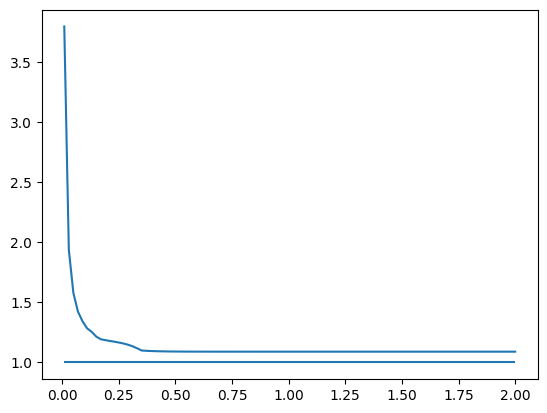

In [24]:
plt.plot(factor,mus)
plt.hlines(1,min(factor),max(factor))

In [13]:
model1 = pyhf.simplemodels.uncorrelated_background(
    signal=signalt.tolist(), bkg=bkg1.tolist(), bkg_uncertainty=errbkg1.tolist()
) #creamos el modelo
model1 #Modelo

In [14]:
"""model2 = pyhf.simplemodels.uncorrelated_background(
    signal=s2.tolist(), bkg=bkg1.tolist(), bkg_uncertainty=errbkg1.tolist()
) #creamos el modelo
model2 #Modelo"""

'model2 = pyhf.simplemodels.uncorrelated_background(\n    signal=s2.tolist(), bkg=bkg1.tolist(), bkg_uncertainty=errbkg1.tolist()\n) #creamos el modelo\nmodel2 #Modelo'

In [15]:
observations1 = data.tolist() + model1.config.auxdata  # this is a common pattern!
#observations1 = observed.tolist() + model1.config.auxdata  # this is a common pattern!



In [16]:
poi_values1 = np.linspace(0.1, 5, 50)
obs_limit1, exp_limits1, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations1, model1, poi_values1, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit1:.4f}")
print(f"Upper limit (exp): μ = {exp_limits1[2]:.4f}")

Upper limit (obs): μ = 2.0900
Upper limit (exp): μ = 0.1000


In [17]:
#1.3 mu=1.09 p=0.5
#0.9 mu=1.09 p=0.5
#0.8 mu=1.09 p=0.5
#0.2 mu=1.1829 p=0.5(si se le pone mu=1),p=0.0250(si se le pone mu=a lo que da)

In [18]:
"""poi_values2 = np.linspace(0.1, 5, 50)
obs_limit2, exp_limits2, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(
    observations2, model2, poi_values2, level=0.05, return_results=True
)
print(f"Upper limit (obs): μ = {obs_limit2:.4f}")
print(f"Upper limit (exp): μ = {exp_limits2[2]:.4f}")"""

'poi_values2 = np.linspace(0.1, 5, 50)\nobs_limit2, exp_limits2, (scan, results) = pyhf.infer.intervals.upper_limits.upper_limit(\n    observations2, model2, poi_values2, level=0.05, return_results=True\n)\nprint(f"Upper limit (obs): μ = {obs_limit2:.4f}")\nprint(f"Upper limit (exp): μ = {exp_limits2[2]:.4f}")'

In [19]:
"""muobs1=obs_limit1
muobs2=obs_limit2
muexp1=exp_limits1[2]
muexp2=exp_limits2[2]"""

'muobs1=obs_limit1\nmuobs2=obs_limit2\nmuexp1=exp_limits1[2]\nmuexp2=exp_limits2[2]'

In [20]:
CLs_obs1, tails1 ,CLs_exp_band1 = pyhf.infer.hypotest(
    1.1829, observations1, model1, return_expected_set=True, return_tail_probs = True
)
#SEÑAL 1:HIGGS
print(f"  CLs (obs): Cls = {CLs_obs1:.4f}")
print(f"  CLs (exp): CLs (0σ) = {CLs_exp_band1[2]:.4f}")

  CLs (obs): Cls = 0.5000
  CLs (exp): CLs (0σ) = 0.0000


In [21]:
"""CLs_obs2, tails2 ,CLs_exp_band2 = pyhf.infer.hypotest(
    muexp2, observations2, model2, return_expected_set=True, return_tail_probs = True
)
#SEÑAL 1:AXIL
print(f"  CLs (obs): Cls = {CLs_obs2:.4f}")
print(f"  CLs (exp): CLs (0σ) = {CLs_exp_band2[2]:.4f}")"""

'CLs_obs2, tails2 ,CLs_exp_band2 = pyhf.infer.hypotest(\n    muexp2, observations2, model2, return_expected_set=True, return_tail_probs = True\n)\n#SEÑAL 1:AXIL\nprint(f"  CLs (obs): Cls = {CLs_obs2:.4f}")\nprint(f"  CLs (exp): CLs (0σ) = {CLs_exp_band2[2]:.4f}")'